### Random Forest

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('./dataset/penguins_size.csv')

In [3]:
df = df.dropna()

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [5]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)

In [7]:
y = df['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
rfc = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state = 101)

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [14]:
preds = rfc.predict(X_test)

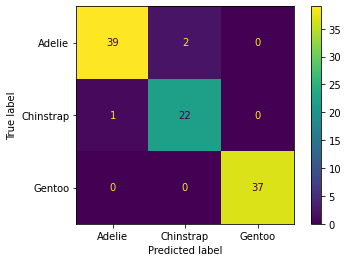

In [17]:
plot_confusion_matrix(rfc, X_test, y_test)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



### RANDOM FOREST 2

In [19]:
df = pd.read_csv('./dataset/data_banknote_authentication.csv')

In [20]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


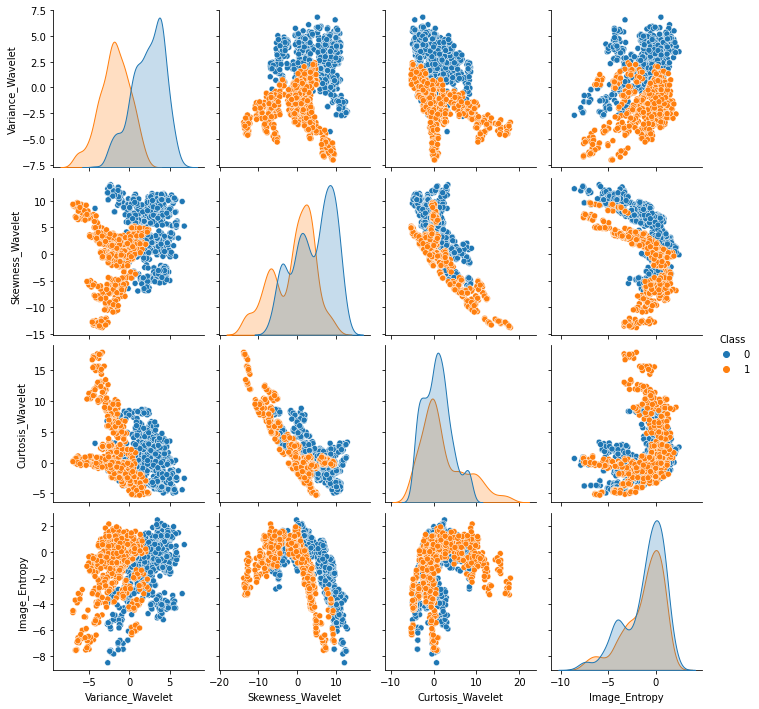

In [21]:
sns.pairplot(df, hue = 'Class')

In [22]:
X = df.drop('Class', axis = 1)

In [23]:
y = df['Class']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [38]:
n_estimators = [64, 100, 128, 200]

In [39]:
max_features = [2, 3, 4]

In [40]:
bootstrap = [True, False]

In [41]:
oob_score = [True, False]

In [42]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap': bootstrap,
    'oob_score':oob_score
}

In [43]:
rfc = RandomForestClassifier()

In [44]:
grid = GridSearchCV(rfc, param_grid)

In [45]:
grid.fit(X_train, y_train)

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [46]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [47]:
rfc = RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [49]:
rfc.oob_score_

0.9939965694682675

In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



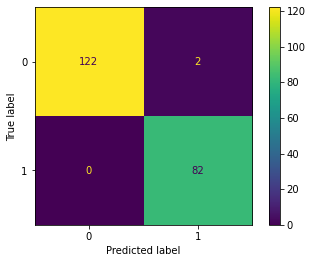

In [52]:
plot_confusion_matrix(rfc, X_test, y_test)

In [54]:
errors = []
misclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(n_estimators = n, max_features = 2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

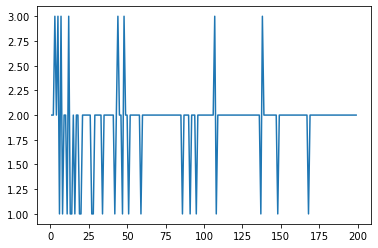

In [56]:
plt.plot(range(1, 200), misclassifications)

In [57]:
### RANDOM FOREST WITH REGRESSION

In [58]:
df = pd.read_csv('./dataset/rock_density_xray.csv')

In [59]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [60]:
df.columns = ['Signal', 'Density']

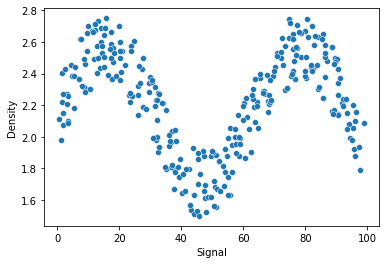

In [61]:
sns.scatterplot(data = df, x='Signal', y='Density')

In [67]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [69]:
lr_model = LinearRegression()

In [70]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [71]:
lr_preds = lr_model.predict(X_test)

In [72]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [74]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [75]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

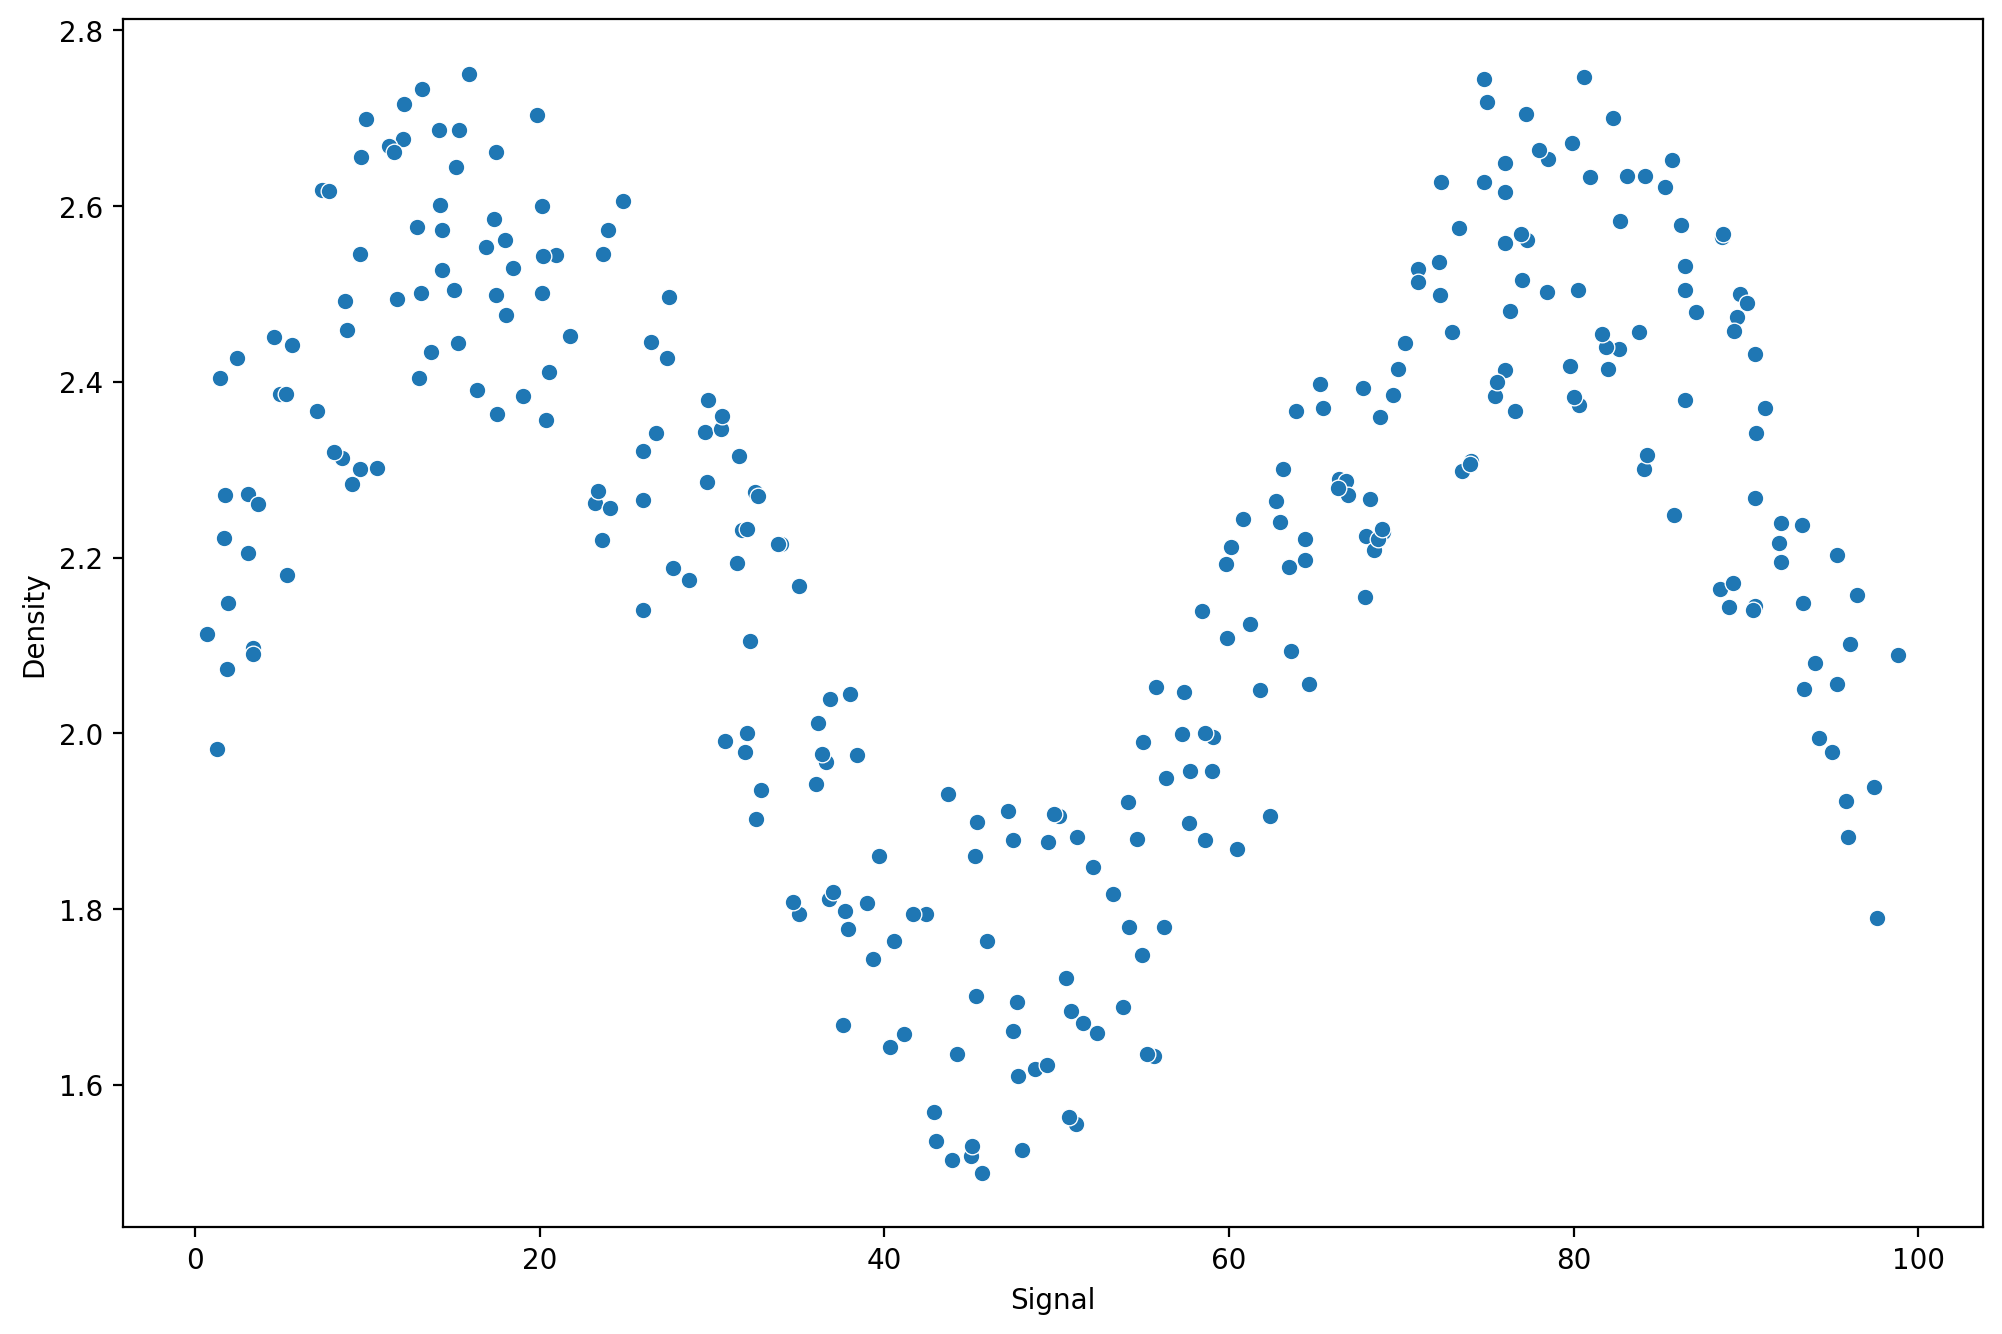

In [76]:
plt.figure(figsize=(12,8), dpi = 200)
sns.scatterplot(data = df, x='Signal', y='Density')

In [77]:
signal_range = np.arange(0,100)

In [79]:
# Fix issue with Polynomial Regression

In [82]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    # Create figure
    plt.figure(figsize=(12, 8), dpi = 200)
    sns.scatterplot(x='Signal', y = 'Density', data = df, color = 'red')
    plt.plot(signal_range, signal_preds)

MAE:0.211198973318633
RMSE:0.25700519965846297


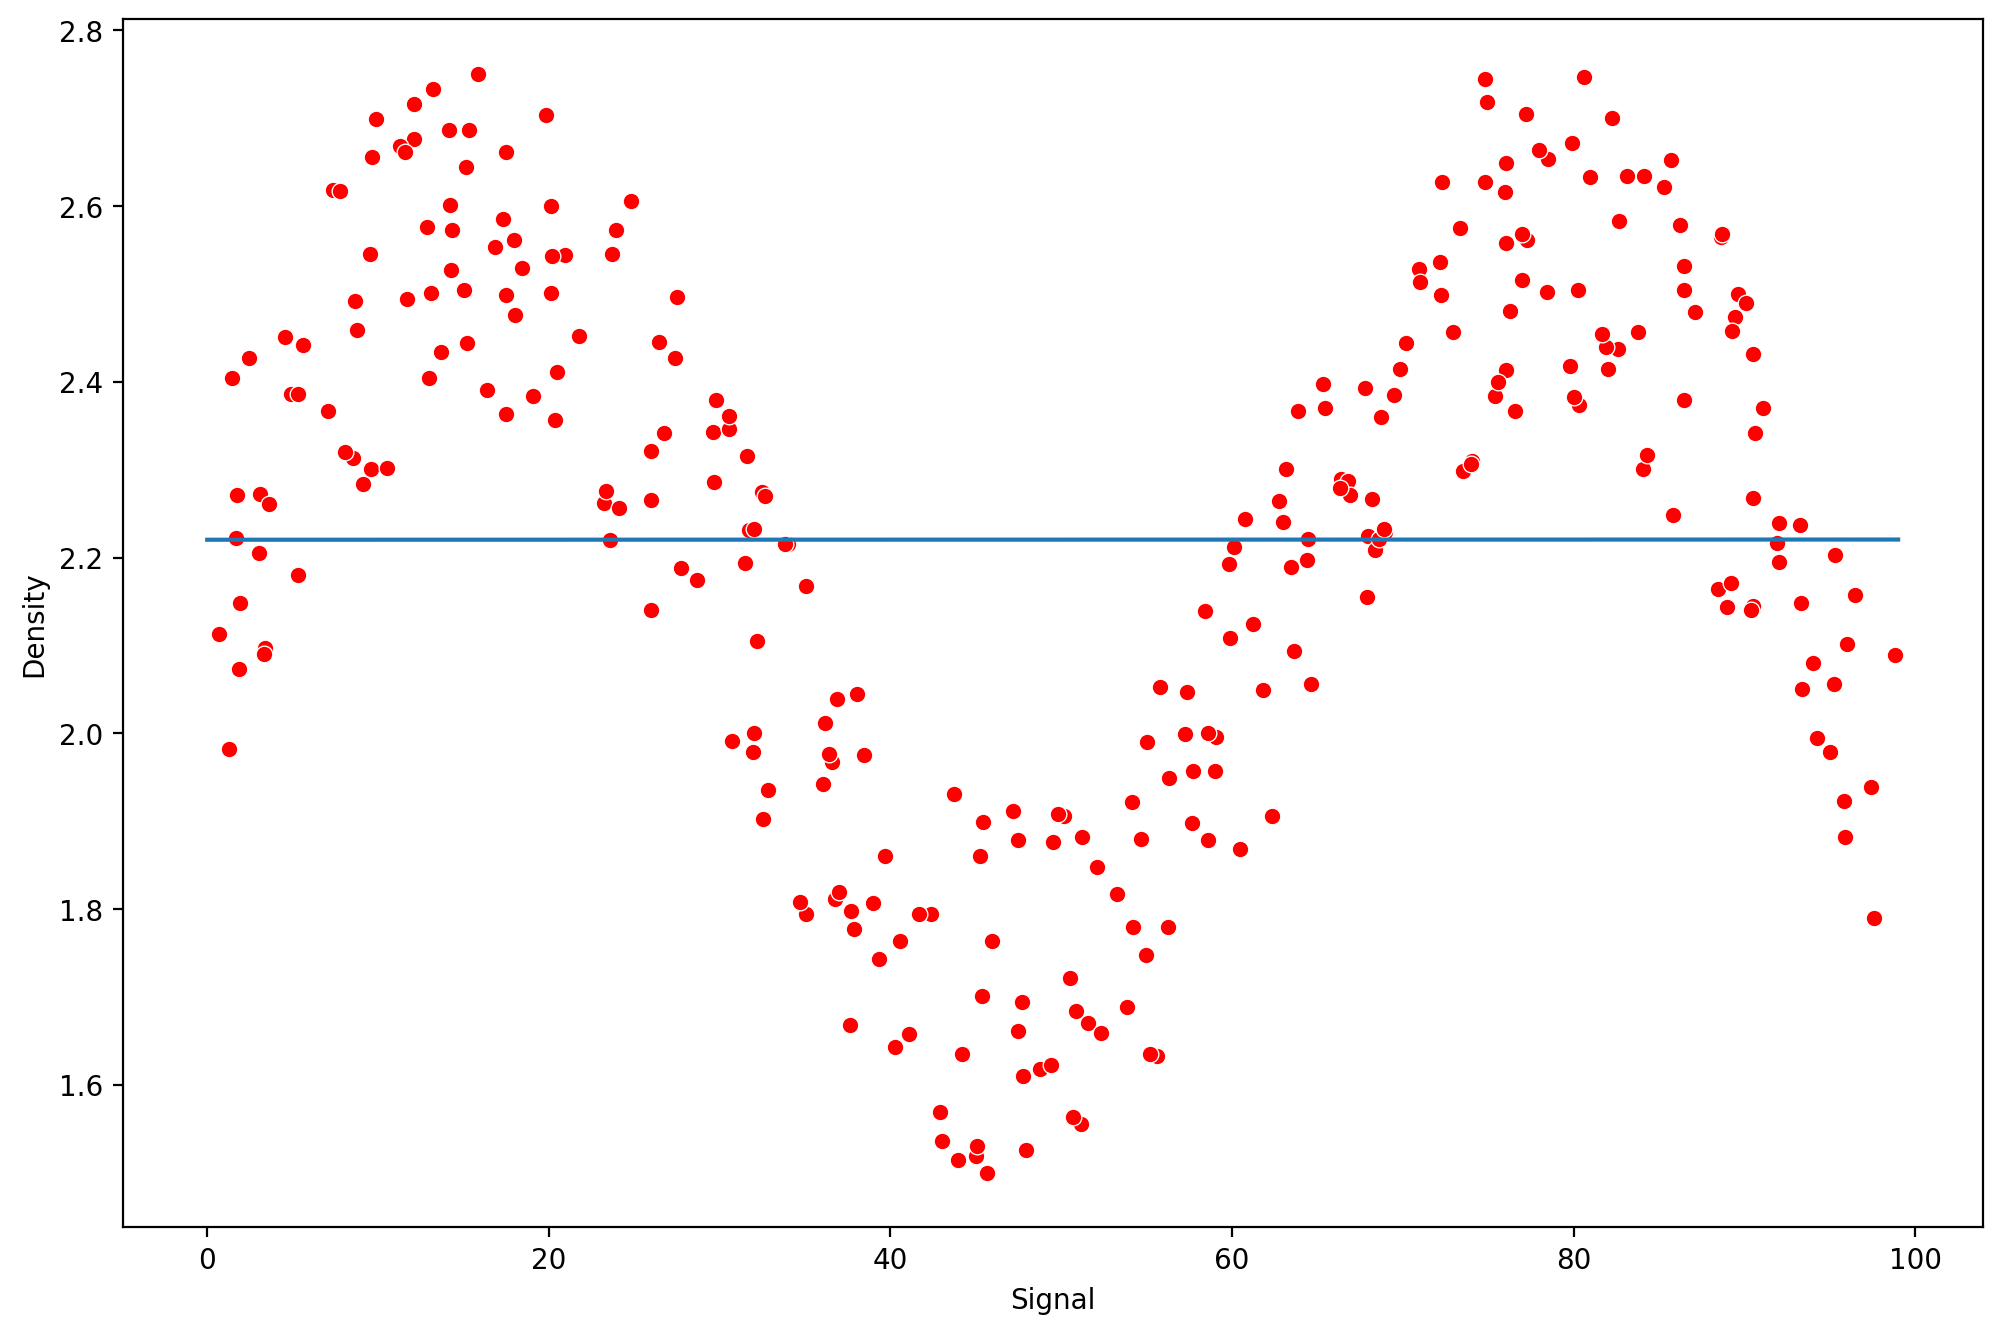

In [83]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

MAE:0.11969180247549911
RMSE:0.13807525996321957


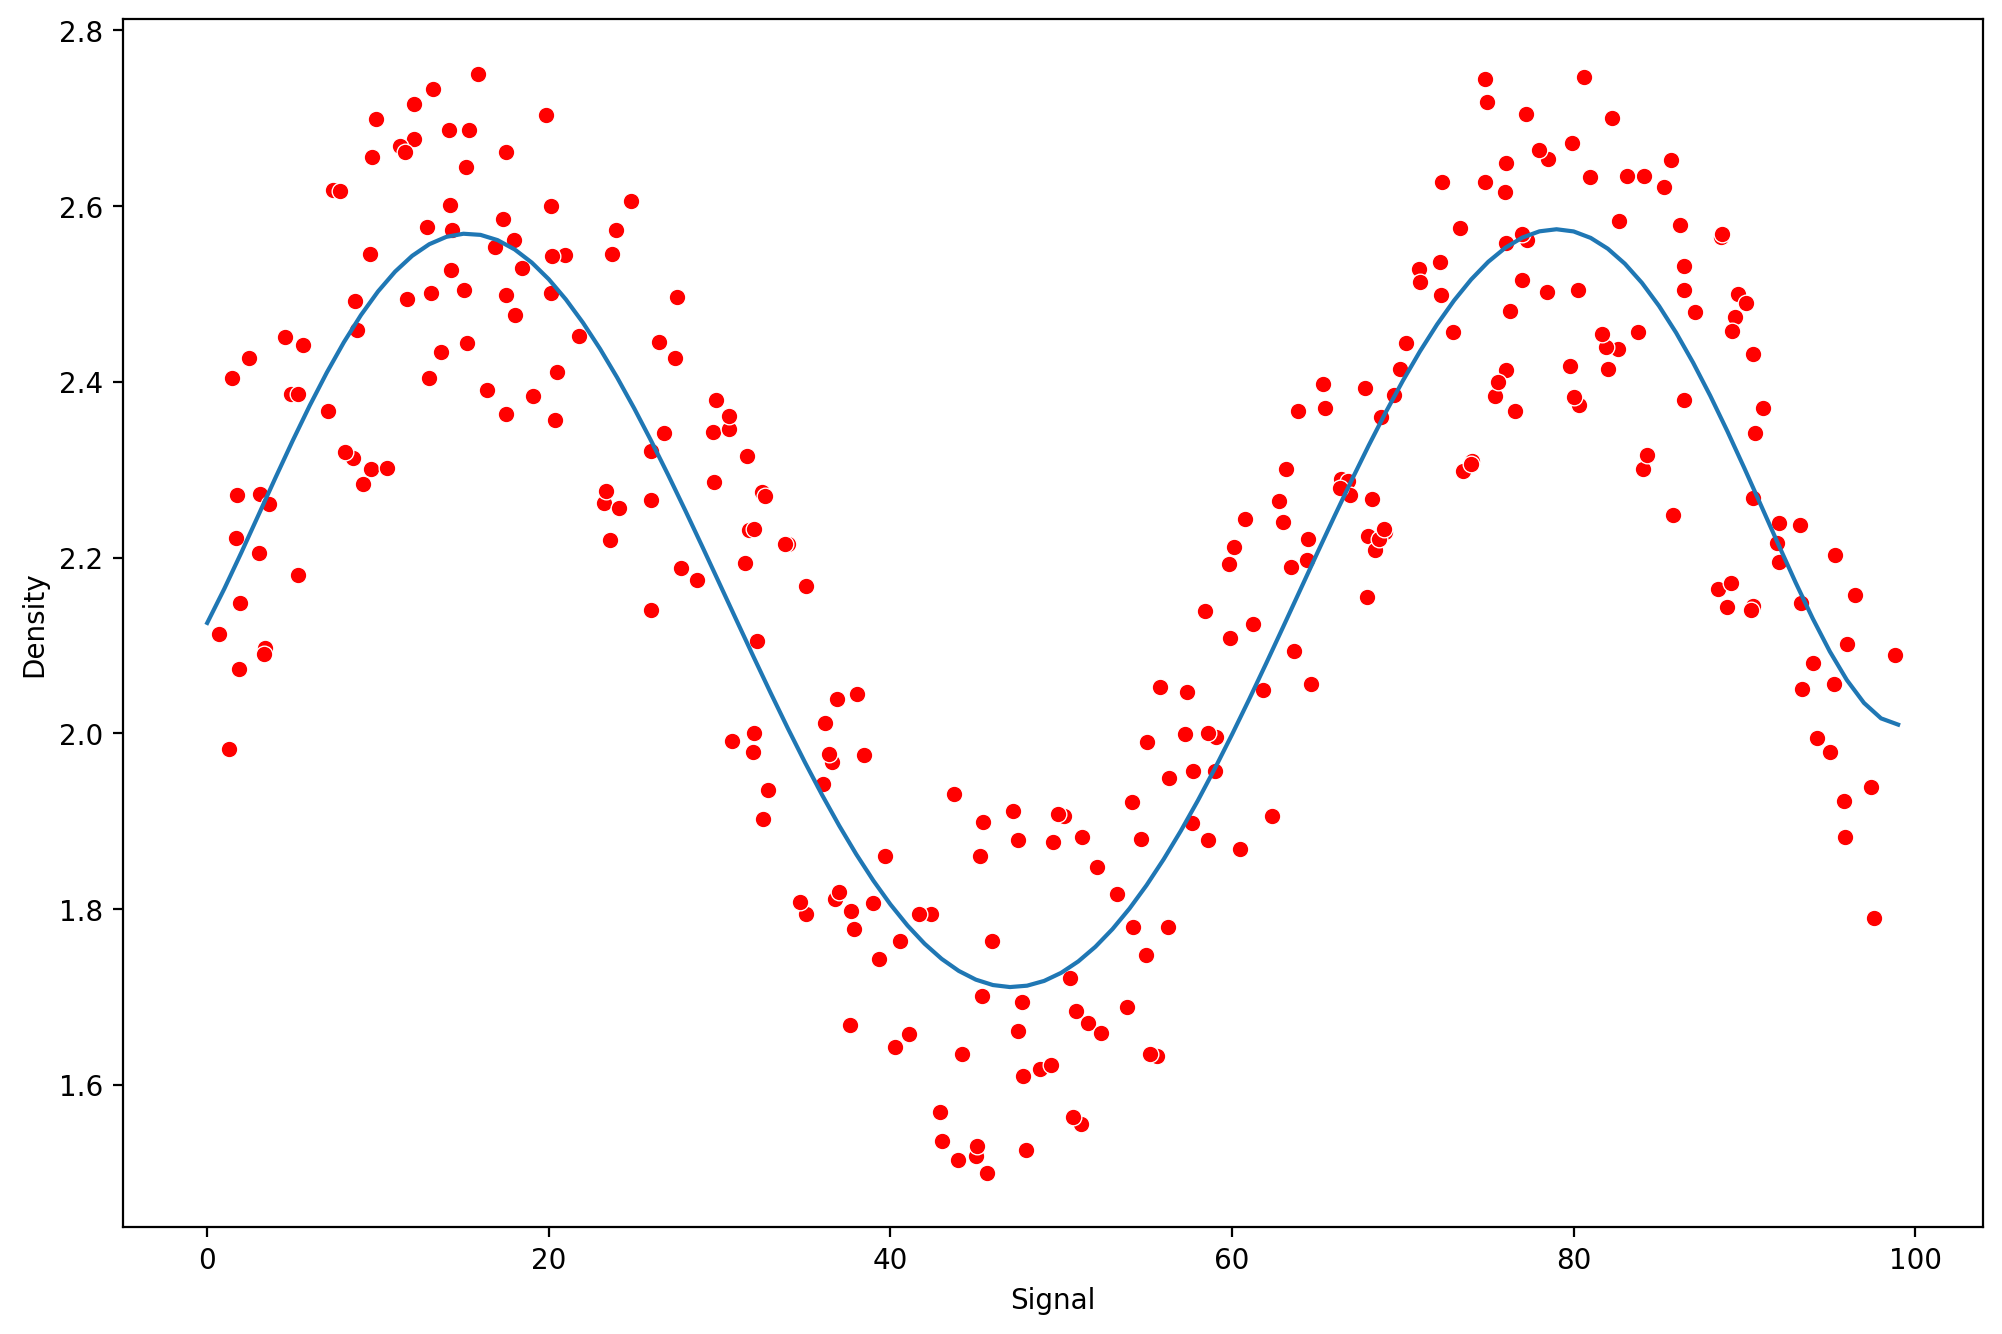

In [90]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)